In [13]:
# ================================================
# 1️⃣ Import Libraries
# ================================================
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


In [14]:
# ================================================
# 2️⃣ Load Dataset
# ================================================
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("Train Images Shape:", train_images.shape)
print("Test Images Shape:", test_images.shape)

# Class Names
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

Train Images Shape: (60000, 28, 28)
Test Images Shape: (10000, 28, 28)


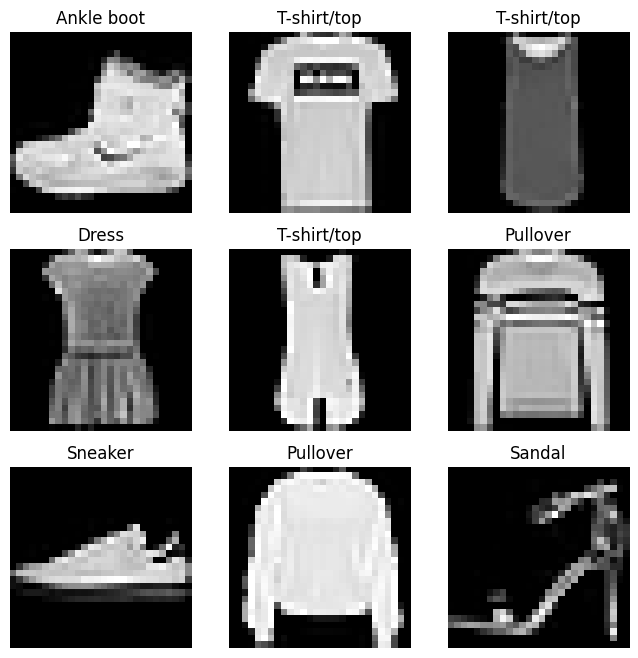

In [15]:
# ================================================
# 3️⃣ Visualize Sample Images
# ================================================
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.show()

In [16]:
# ================================================
# 4️⃣ Data Preprocessing
# ================================================
# Normalize pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Add channel dimension
train_images = train_images.reshape(-1,28,28,1)
test_images = test_images.reshape(-1,28,28,1)

In [17]:
# ================================================
# 5️⃣ Data Augmentation
# ================================================
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.1  # reserve 10% for validation
)

datagen.fit(train_images)

In [18]:
# ================================================
# 6️⃣ Build CNN Model (with Dropout)
# ================================================
model = models.Sequential([
    # Conv Layer 1
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    # Conv Layer 2
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Flatten
    layers.Flatten(),

    # Dense Layer + Dropout
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    # Output Layer
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# ================================================
# 7️⃣ Compile Model
# ================================================
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
# ================================================
# 8️⃣ Early Stopping Callback
# ================================================
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [21]:
# ================================================
# 9️⃣ Train Model using Augmented Data
# ================================================
batch_size = 64
epochs = 20

train_generator = datagen.flow(train_images, train_labels, batch_size=batch_size, subset='training')
val_generator = datagen.flow(train_images, train_labels, batch_size=batch_size, subset='validation')

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/20
844/844 - 24s - 28ms/step - accuracy: 0.6932 - loss: 0.8219 - val_accuracy: 0.7710 - val_loss: 0.6023
Epoch 2/20
844/844 - 23s - 28ms/step - accuracy: 0.7719 - loss: 0.6106 - val_accuracy: 0.8078 - val_loss: 0.5094
Epoch 3/20
844/844 - 22s - 26ms/step - accuracy: 0.7936 - loss: 0.5487 - val_accuracy: 0.8168 - val_loss: 0.4804
Epoch 4/20
844/844 - 21s - 25ms/step - accuracy: 0.8078 - loss: 0.5163 - val_accuracy: 0.8392 - val_loss: 0.4274
Epoch 5/20
844/844 - 22s - 26ms/step - accuracy: 0.8211 - loss: 0.4812 - val_accuracy: 0.8505 - val_loss: 0.4033
Epoch 6/20
844/844 - 21s - 25ms/step - accuracy: 0.8303 - loss: 0.4572 - val_accuracy: 0.8325 - val_loss: 0.4196
Epoch 7/20
844/844 - 23s - 27ms/step - accuracy: 0.8367 - loss: 0.4385 - val_accuracy: 0.8603 - val_loss: 0.3649
Epoch 8/20
844/844 - 23s - 27ms/step - accuracy: 0.8431 - loss: 0.4233 - val_accuracy: 0.8580 - val_loss: 0.3689
Epoch 9/20
844/844 - 22s - 26ms/step - accuracy: 0.8489 - loss: 0.4106 - val_accuracy: 0.8475 - 

In [22]:
# ================================================
# 🔟 Evaluate on Test Data
# ================================================
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")


✅ Test Accuracy: 89.32%


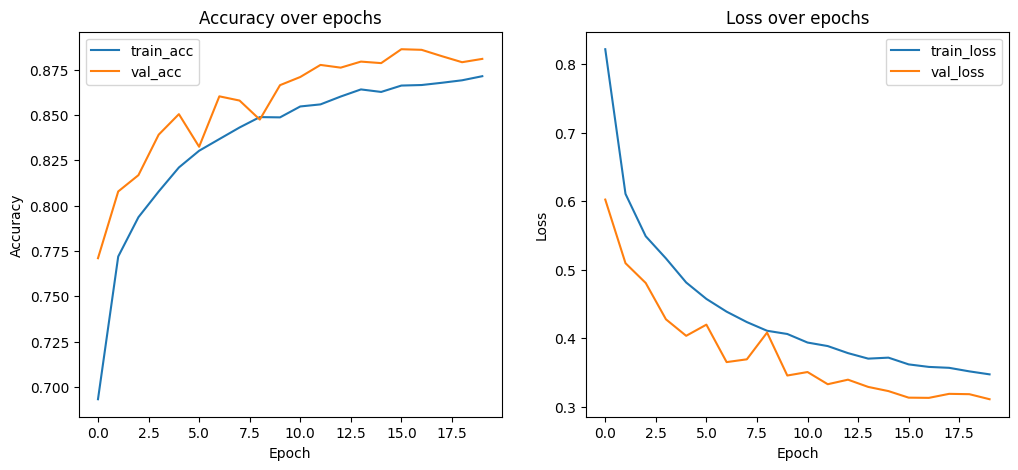

In [23]:
# ================================================
# 11️⃣ Plot Training Curves
# ================================================
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


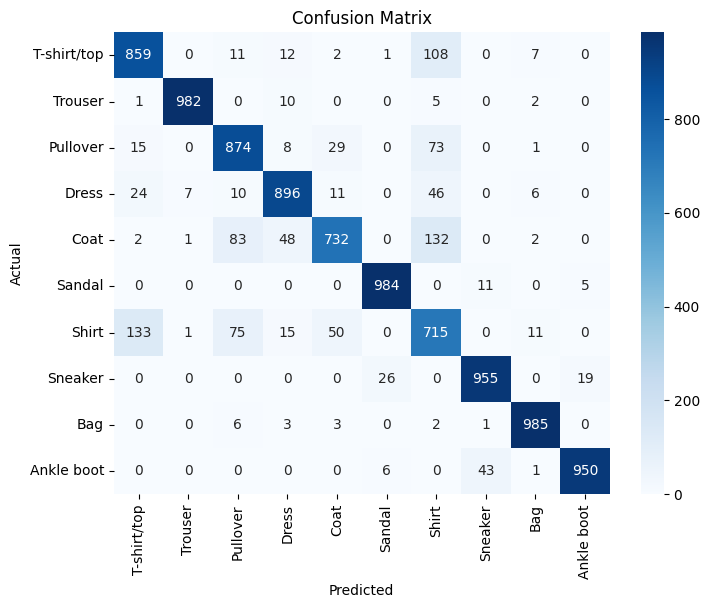


Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.86      0.84      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.83      0.87      0.85      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.89      0.73      0.80      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.66      0.71      0.69      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [24]:
# ================================================
# 12️⃣ Make Predictions & Confusion Matrix
# ================================================
predictions = model.predict(test_images)
y_pred = np.argmax(predictions, axis=1)

# Confusion Matrix
cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(test_labels, y_pred, target_names=class_names))

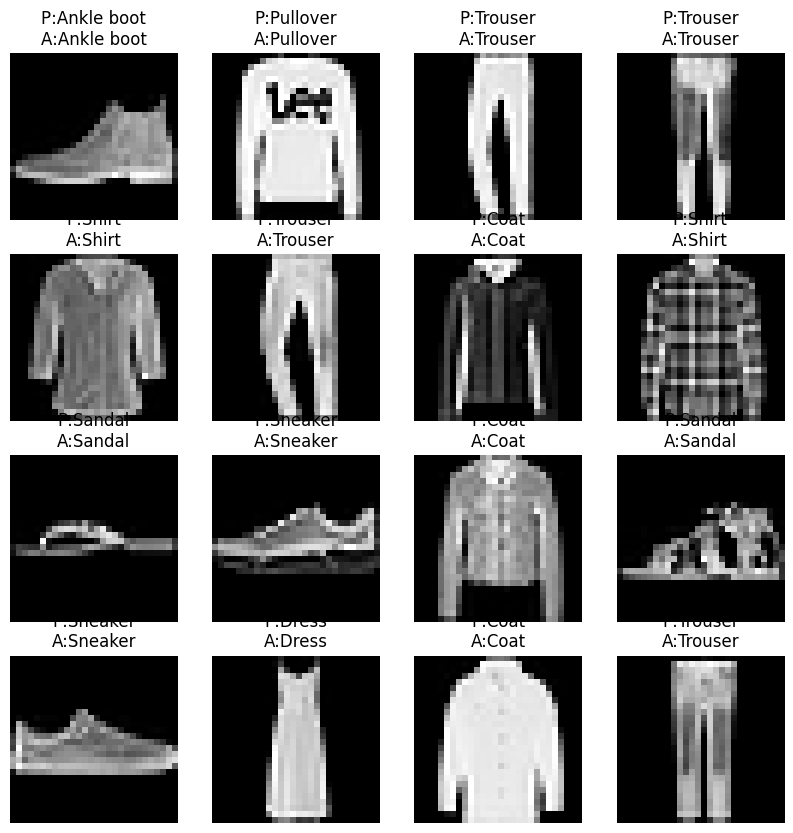

In [25]:
# ================================================
# 13️⃣ Show Sample Predictions
# ================================================
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(test_images[i].reshape(28,28), cmap='gray')
    plt.title(f"P:{class_names[y_pred[i]]}\nA:{class_names[test_labels[i]]}")
    plt.axis('off')
plt.show()

In [28]:
# ================================================
# 14️⃣ Save Model
# ================================================
import warnings
warnings.filterwarnings('ignore')
model.save("fashion_mnist_cnn_professional.h5")
print("Model saved successfully!")

Model saved successfully!
